### 线性回归

In [4]:
# 线性回归
'''
得到的结果是一条直线。回归任务与分类任务可以相互转换。

1、样本本身不是回归的，但是θ参数本身是一次的，
    也可以在线性回归的框架下。

2、分段线性回归，所以lr就是分段加权线性回归。
    这样参数θ就很多了，甚至跟样本是同级别。
    通常的做法，权值ω看成是高斯核，离得近就取大一些，
    离得远就取小一些。
    
3、典型的监督学习

4、结果具有很好的解释性

'''

'\n得到的结果是一条直线。回归任务与分类任务可以相互转换。\n\n1、样本本身不是回归的，但是θ参数本身是一次的，\n    也可以在线性回归的框架下。\n\n2、分段线性回归，所以lr就是分段加权线性回归。\n    这样参数θ就很多了，甚至跟样本是同级别。\n    通常的做法，权值ω看成是高斯核，离得近就取大一些，\n    离得远就取小一些。\n    \n3、典型的监督学习\n\n4、结果具有很好的解释性\n\n'

### 简单线性回归

In [5]:
'''
简单线性回归是用一条直线来拟合二维平面的点。

y_ = a*x + b，这个y_是预测值
y(i) 是真值

损失函数（目标函数） J = ∑(y(i) - a*x(i) - b)^2 最小
J 函数是凸函数，只有一个极值点。
D(J)/D(a) = 0
D(J)/D(b) = 0

参数的解
a = ∑ (x(i) - x_)*(y(i) - y_) / (x(i) - x_)
b = y_ - a*x_
x(i)表示X的某个样本
y_ 表示y的均值，x_表示x的均值
'''
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 3., 2., 3., 5.])

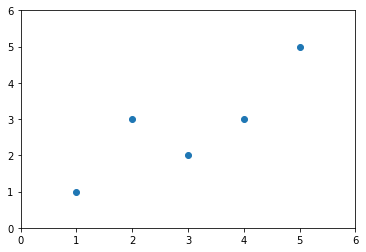

In [7]:
plt.scatter(x,y)
plt.axis([0, 6, 0, 6])
plt.show()

In [8]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [16]:
num = 0.0
d = 0.0
for x_i, y_i in zip(x,y):
    num += (x_i - x_mean)*(y_i - y_mean)
    d += (x_i - x_mean) ** 2
a = num / d
b =y_mean - a * x_mean

In [17]:
a

0.8

In [18]:
b

0.39999999999999947

In [19]:
# 预测值为y_
y_ = a * x + b

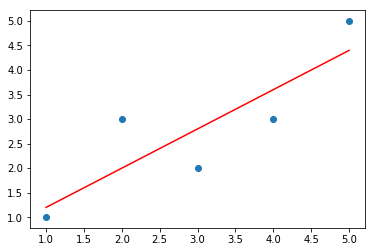

In [20]:
plt.scatter(x,y)
plt.plot(x, y_, color='r')
plt.show()

In [21]:
# 给定一个值6，得到回归结果y_predict
x_predict = 6
y_predict = a*6+b
y_predict

5.2

#### 简单线性回归实现1

In [25]:
class SimpleLinearRegression1:

    def __init__(self):
        """初始化Simple Linear Regression 模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练集x_train，y_train 训练Simple Linear Regression 模型"""
        assert x_train.ndim == 1,\
            "Simple Linear Regression can only solve simple feature training data"
        assert len(x_train) == len(y_train),\
            "the size of x_train must be equal to the size of y_train"

        # 求均值
        x_mean = x_train.mean()
        y_mean = y_train.mean()

        # 分子
        num = 0.0
        # 分母
        d = 0.0

        # 计算分子分母
        for x_i, y_i in zip(x_train, y_train):
            num += (x_i-x_mean)*(y_i-y_mean)
            d += (x_i-x_mean) ** 2

        # 计算参数a和b
        self.a_ = num/d
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测集x_predict是一个向量，返回x_predict对应的预测结果值"""
        assert x_predict.ndim == 1,\
            "Simple Linear Regression can only solve simple feature training data"
        assert self.a_ is not None and self.b_ is not None,\
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x_single，返回x_single对应的预测结果值"""
        return self.a_*x_single+self.b_

    def __repr__(self):
        return "SimpleLinearRegression1()"

In [27]:
reg1 = SimpleLinearRegression1()
reg1.fit(x,y)

SimpleLinearRegression1()

In [28]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [29]:
reg1.a_

0.8

In [30]:
reg1.b_

0.39999999999999947

In [33]:
y_ = reg1.predict(x)

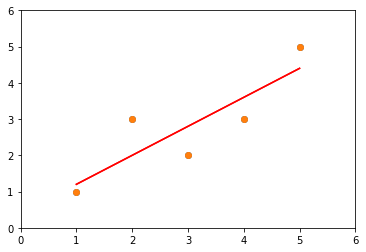

In [34]:
plt.scatter(x,y)
plt.plot(x, y_, color='r')
plt.axis([0,6,0,6])
plt.show()

#### 向量化运算

In [36]:
# ∑ 用 向量点乘代替，提升运算速度
# 将参数转换成 w*v的向量相乘形式
class SimpleLinearRegression2:

    def __init__(self):
        """初始化Simple Linear Regression 模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练集x_train，y_train 训练Simple Linear Regression 模型"""
        assert x_train.ndim == 1,\
            "Simple Linear Regression can only solve simple feature training data"
        assert len(x_train) == len(y_train),\
            "the size of x_train must be equal to the size of y_train"

        # 求均值
        x_mean = x_train.mean()
        y_mean = y_train.mean()

        # 分子
        num = (x_train - x_mean).dot(y_train - y_mean)
        # 分母
        d = (x_train - x_mean).dot(x_train - x_mean)

        # 计算参数a和b
        self.a_ = num/d
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测集x_predict是一个向量，返回x_predict对应的预测结果值"""
        assert x_predict.ndim == 1,\
            "Simple Linear Regression can only solve simple feature training data"
        assert self.a_ is not None and self.b_ is not None,\
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x_single，返回x_single对应的预测结果值"""
        return self.a_*x_single+self.b_

    def score(self, x_test, y_test):
            """根据测试数据集 x_test 和 y_test 确定当前模型的准确度"""
            y_predict = self.predict(x_test)
            return r2_score(y_test, y_predict)

    def __repr__(self):
        return "SimpleLinearRegression2()"

In [37]:
reg2 = SimpleLinearRegression2()
reg2.fit(x,y)

SimpleLinearRegression2()

In [38]:
reg2.a_

0.8

In [39]:
reg2.b_

0.39999999999999947

#### 向量化实现的性能测试

In [40]:
m = 1000000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

In [41]:
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

1.19 s ± 4.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25.5 ms ± 814 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
print(reg1.a_)
print(reg2.a_)

2.0015185965943783
2.0015185965943494


In [43]:
print(reg1.b_)
print(reg2.b_)

2.998609087340796
2.99860908734081


### 回归算法的评价

In [47]:
"""
衡量标准：
    1、均方差MSE = 1/m * ∑(y_test_ - y_test)^2  与测试样本数M无关。
    2、sqrt(MSE) 均方根误差。求根号的意义是保证mes的量纲和y一致。
    3、MAE 平均绝对误差 1/m * ∑|y_test_ - y_test|
"""

'\n衡量标准：\n    1、均方差MSE = 1/m * ∑(y_test_ - y_test)^2  与测试样本数M无关。\n    2、sqrt(MSE) 均方根误差。求根号的意义是保证mes的量纲和y一致。\n    3、MAE 平均绝对误差 1/m * ∑|y_test_ - y_test|\n'

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#### 波士顿房价数据

In [51]:
boston = datasets.load_boston()
print(boston.DESCR)
# 13个特征

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [52]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [53]:
# 只取RM 房间数这个特征测试
x = boston.data[:,5]
y = boston.target
x.shape

(506,)

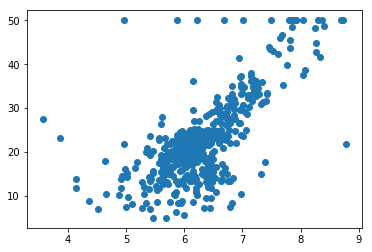

In [54]:
plt.scatter(x,y)
plt.show()

In [55]:
np.max(y)

50.0

In [56]:
# 过滤最大值，通常最大值可能是异常值
x = x[y < 50.0]
y = y[y < 50.0]

In [57]:
x.shape

(490,)

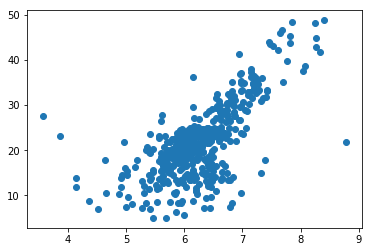

In [58]:
plt.scatter(x,y)
plt.show()

In [61]:
# 使用简单的线性回归
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [62]:
x_train.shape

(367,)

In [63]:
x_test.shape

(123,)

In [64]:
reg = SimpleLinearRegression2()

In [65]:
reg.fit(x,y)

SimpleLinearRegression2()

In [66]:
reg.a_

8.268557322426982

In [67]:
reg.b_

-30.005120145375848

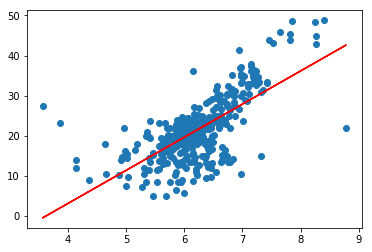

In [68]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [69]:
# 测试集结果
y_predict = reg.predict(x_test)

In [70]:
# mse
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

30.185951950541835

In [71]:
# rmse
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

5.494174364774186

In [73]:
# mae
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.895585151691751

In [74]:
"""
RMSE 平方累加后再开根号，如果某些预测结果和真实结果相差非常大，
那么RMSE的结果会相对变大，所以RMSE有放大误差的趋势，而MAE没有，
他直接就反应的是预测结果和真实结果直接的差距，正因如此，从某种程度上来说，
想办法我们让RMSE变的更小小对于我们来说比较有意义，因为这意味着整个样本的错误中，
那个最值相对比较小，而且我们之前训练样本的目标，
就是RMSE根号里面1/m的这一部分，而这一部分的本质和优化RMSE是一样的
"""

'\nRMSE 平方累加后再开根号，如果某些预测结果和真实结果相差非常大，\n那么RMSE的结果会相对变大，所以RMSE有放大误差的趋势，而MAE没有，\n他直接就反应的是预测结果和真实结果直接的差距，正因如此，从某种程度上来说，\n想办法我们让RMSE变的更小小对于我们来说比较有意义，因为这意味着整个样本的错误中，\n那个最值相对比较小，而且我们之前训练样本的目标，\n就是RMSE根号里面1/m的这一部分，而这一部分的本质和优化RMSE是一样的\n'

In [87]:
def mean_squared_error(y_true, y_predict):
    """计算y_true和y_predict之间的MSE"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"

    return np.sum((y_true - y_predict)**2) / len(y_true)


def root_mean_squared_error(y_true, y_predict):
    """计算y_true和y_predict之间的RMSE"""

    return sqrt(mean_squared_error(y_true, y_predict))


def mean_absolute_error(y_true, y_predict):
    """计算y_true和y_predict之间的RMSE"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"

    return np.sum(np.absolute(y_true - y_predict)) / len(y_true)

def r2_square(y_test, y_predict):
    return 1 - mean_squared_error(y_test,y_predict) / np.var(y_test)

#### sklearn中调用mse和mae

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_predict)

30.185951950541835

In [77]:
mean_absolute_error(y_test,y_predict)

3.895585151691751

### 最好的评测线性回归指标 R Squared

In [79]:
"""
可能预测房源准确度，RMSE或者MAE的值为5，预测学生的分数，结果的误差是10，
这个5和10没有判断性，因为5和10对应不同的单位和量纲，无法比较

R^2 = 1 - SS_assum/SS_total = 1- ∑(y_ - y)^2/ ∑(y_mean - y)
分子是使用我们的模型预测产生的错误。

分母是使用y=y_mean 预测产生的结果，与x无关，比较生硬的结果，这样预测的结果肯定很差，一般称为baseline model
使用BaseLine Model产生的错误会很大，使用我们的模型预测产生的错误会相对少些（因为我们的模型充分的考虑了y和x之间的关系），
用这两者相减，结果就是拟合了我们的错误指标，用1减去这个商结果就是我们的模型没有产生错误的指标

R^2 <= 1
R^2 =1 分子为0，我们的预测模型没有错误，R方越大越好
R方等于0，相当于没有训练。

R方小于0，我们的模型得到的结果还不如不训练的均值模型。可能说明数据之间没有线性关系

R方 = 1 - MSE(y_,y) / Var(y)

"""

'\n可能预测房源准确度，RMSE或者MAE的值为5，预测学生的分数，结果的误差是10，\n这个5和10没有判断性，因为5和10对应不同的单位和量纲，无法比较\n\nR^2 = 1 - SS_assum/SS_total = 1- ∑(y_ - y)^2/ ∑(y_mean - y)\n分子是使用我们的模型预测产生的错误。\n\n分母是使用y=y_mean 预测产生的结果，与x无关，比较生硬的结果，这样预测的结果肯定很差，一般称为baseline model\n使用BaseLine Model产生的错误会很大，使用我们的模型预测产生的错误会相对少些（因为我们的模型充分的考虑了y和x之间的关系），\n用这两者相减，结果就是拟合了我们的错误指标，用1减去这个商结果就是我们的模型没有产生错误的指标\n\nR^2 <= 1\nR^2 =1 分子为0，我们的预测模型没有错误，R方越大越好\nR方等于0，相当于没有训练。\n\nR方小于0，我们的模型得到的结果还不如不训练的均值模型。可能说明数据之间没有线性关系\n\nR方 = 1 - MSE(y_,y) / Var(y)\n\n'

#### R Square

In [81]:
1 - mean_squared_error(y_test,y_predict) / np.var(y_test)

0.5118346883849285

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5118346883849285

### 多元线性回归

In [84]:
"""
x的维度是大于1的。

y = θ_0 + θ_1 * x1 + θ_2 * x2 + ... + θ_n * xn

参数矩阵 θ = (θ_0,θ_1,θ_2,θ_3,...θ_n) ^T

X_b 每一行都是一个样本

X_b[0] = [1 x1_1, x1_2, ..., x1_n]
X_b[m] = [1 xm_1, xm_2, ..., xm_n]
   
y_预测值也是一个列向量 m*n * n*1 = m*1
y_ = Xb * θ
"""

'\nx的维度是大于1的。\n\ny = θ_0 + θ_1 * x1 + θ_2 * x2 + ... + θ_n * xn\n\n参数矩阵 θ = (θ_0,θ_1,θ_2,θ_3,...θ_n) ^T\n\nX_b 每一行都是一个样本\n\nX_b[0] = [1 x1_1, x1_2, ..., x1_n]\nX_b[m] = [1 xm_1, xm_2, ..., xm_n]\n   \ny_预测值也是一个列向量 m*n * n*1 = m*1\ny_ = Xb * θ\n'

In [86]:
"""
目标：是(y - Xb*θ)^T(y-Xb*θ) 尽可能小
    可以直接求方程得到解
    
    正规方程解：
        θ = (Xb^T * Xb)^-1 * Xb^T * y
    问题：
        时间复杂度高 O(n^3)
    优点：
        不需要对数据进行归一化处理，因为是直接对数据进行推导
"""

'\n目标：是(y - Xb*θ)^T(y-Xb*θ) 尽可能小\n\n    正规方程解：\n    θ = (Xb^T * Xb)^-1 * Xb^T * y\n    问题：\n        时间复杂度高 O(n^3)\n'

#### 多元线性回归模型实现

In [125]:
class LinearRegression:
    def __init__(self):
        """初始化Linear Regression模型"""

        # 系数向量（θ1,θ2,.....θn）
        self.coef_ = None
        # 截距 (θ0)
        self.interception_ = None
        # θ向量
        self._theta = None
    
    def fit_normal(self, X_train, y_train):
        """直接解方程。根据训练数据集X_train，y_train 训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], "the size of X_train must be equal to the size of y_train"
        # 添加一行1
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.coef_ is not None and self.interception_ is not None,\
            "must fit before predict"
        assert X_predict.shape[1] == len(self.coef_),\
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)
    def score(self, X_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)
    
    def __repr__(self):
        return "LinearRegression()"

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [127]:
# 使用简单的线性回归
from sklearn.model_selection import train_test_split
boston = datasets.load_boston()
x = boston.data
y = boston.target
x = x[y < 50.0]
y = y[y < 50.0]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=666)

In [128]:
x.shape

(490, 13)

In [129]:
reg = LinearRegression()

In [130]:
reg.fit_normal(x_train, y_train)

LinearRegression()

In [131]:
reg.coef_

array([-1.14235739e-01,  3.12783163e-02, -4.30926281e-02, -9.16425531e-02,
       -1.09940036e+01,  3.49155727e+00, -1.40778005e-02, -1.06270960e+00,
        2.45307516e-01, -1.23179738e-02, -8.80618320e-01,  8.43243544e-03,
       -3.99667727e-01])

In [132]:
reg.interception_

32.645660839640875

In [133]:
# 比单个指标更好
reg.score(x_test, y_test)

0.8008916199519345

#### sklearn中的线性回归问题

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=666)

In [140]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [141]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
lin_reg.coef_

array([-1.14235739e-01,  3.12783163e-02, -4.30926281e-02, -9.16425531e-02,
       -1.09940036e+01,  3.49155727e+00, -1.40778005e-02, -1.06270960e+00,
        2.45307516e-01, -1.23179738e-02, -8.80618320e-01,  8.43243544e-03,
       -3.99667727e-01])

In [143]:
lin_reg.score(X_test,y_test)

0.8008916199519077

#### KNN 回归

In [145]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
knn_reg.score(X_test, y_test)

0.602674505080953

In [146]:
# 网格搜索超参数
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights" : ["uniform"],
        "n_neighbors":[i for i in range(1,11)]
    },
    {
        "weights" : ["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p":[i for i in range(1,6)]
    }
]
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg,param_grid,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [147]:
grid_search.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [149]:
# 运用了CV交叉验证的方式
grid_search.best_score_

0.6060327991735741

In [150]:
# 使用网格搜索得到回归参数后，在计算score
# 使用搜索时，比不搜索好，同时，score搜索时是用cv的score比较
grid_search.best_estimator_.score(X_test,y_test)

0.7354244906092771

### 线性回归的可解性和更多思考

#### 可解释性

In [152]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.coef_

array([-1.05574295e-01,  3.52748549e-02, -4.35179251e-02,  4.55405227e-01,
       -1.24268073e+01,  3.75411229e+00, -2.36116881e-02, -1.21088069e+00,
        2.50740082e-01, -1.37702943e-02, -8.38888137e-01,  7.93577159e-03,
       -3.50952134e-01])

In [153]:
# 将特征结果坐标排序
np.argsort(lin_reg.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  8,  3,  5], dtype=int64)

In [156]:
# 将排序过后的坐标对应的名称展示出来，方便观察理解
boston.feature_names[np.argsort(lin_reg.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

In [ ]:
"""
RM对应的是房间数，是正相关最大的特征，也就是说房间数越多，房价越高，
这是很合理的 NOX对应的是一氧化氮浓度，也就是说一氧化氮浓度越低，房价越低，这也是非常合理的 由此说明，
我们的线性回归具有可解释性，我们可以在对研究一个模型的时候，
可以先用线性回归模型看一下，然后根据感性的认识去直观的判断一下是否符合我们的语气
"""